# USING CNN

In [41]:
import tensorflow as tf

In [65]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32
NUM_CLASSES = 3

In [43]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    rotation_range=20,  
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True,
)

In [44]:
train_generator = train_data.flow_from_directory(
    'train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 4079 images belonging to 3 classes.


In [45]:
val_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  
    width_shift_range=0.2, 
    height_shift_range=0.2,
    fill_mode='nearest'
)

In [46]:
val_generator = val_data.flow_from_directory(
    'validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 562 images belonging to 3 classes.


In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [51]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
128/128 [==============================] - 76s 581ms/step - loss: 0.8551 - accuracy: 0.6065 - val_loss: 0.8666 - val_accuracy: 0.5747
Epoch 2/20
128/128 [==============================] - 74s 577ms/step - loss: 0.8429 - accuracy: 0.6203 - val_loss: 0.9914 - val_accuracy: 0.5196
Epoch 3/20
128/128 [==============================] - 73s 570ms/step - loss: 0.8404 - accuracy: 0.6144 - val_loss: 0.8860 - val_accuracy: 0.5872
Epoch 4/20
128/128 [==============================] - 74s 582ms/step - loss: 0.8351 - accuracy: 0.6168 - val_loss: 0.8238 - val_accuracy: 0.6263
Epoch 5/20
128/128 [==============================] - 73s 571ms/step - loss: 0.8366 - accuracy: 0.6266 - val_loss: 0.8340 - val_accuracy: 0.6281
Epoch 6/20
128/128 [==============================] - 74s 578ms/step - loss: 0.8174 - accuracy: 0.6315 - val_loss: 0.9627 - val_accuracy: 0.5249
Epoch 7/20
128/128 [==============================] - 74s 576ms/step - loss: 0.8225 - accuracy: 0.6298 - val_loss: 0.8392 - val_ac

In [53]:
import numpy as np
from PIL import Image

In [54]:
import matplotlib.pyplot as plt

In [55]:
test_img = Image.open('5.jpeg')
test_img = test_img.resize((IMG_WIDTH, IMG_HEIGHT))
test_img = np.array(test_img) / 255.0

In [56]:
test_img = np.expand_dims(test_img, axis=0)

In [57]:
predictions = model.predict(test_img)

1/1 [==============================] - 0s 90ms/step


In [58]:
predicted_class = np.argmax(predictions)
classes = ['Bicycle', 'Helmet', 'Skateboard'] 
predicted_label = classes[predicted_class]

print("Class is:", predicted_label)

Class is: Helmet


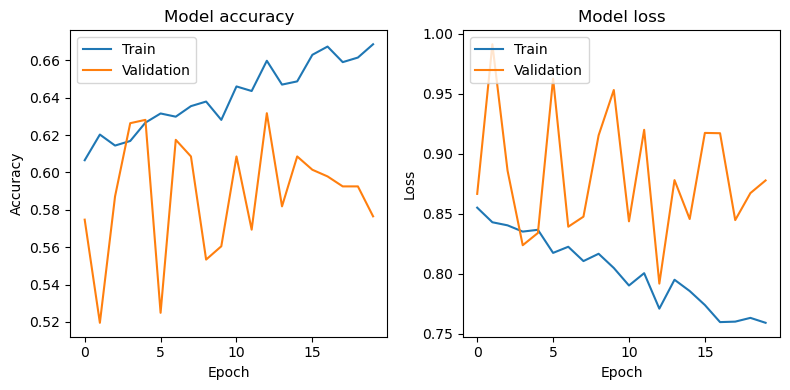

In [60]:
plt.figure(figsize=(8, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 50176)            

# USING ResNET

In [62]:
from tensorflow.keras import layers, models

In [63]:
def res_block(x, filters, kernel_size=3, strides=1, activation='relu'):

    y = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation(activation)(y)
    
    y = layers.Conv2D(filters, kernel_size, padding='same')(y)
    y = layers.BatchNormalization()(y)
    
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = x
    
    y = layers.add([y, shortcut])
    y = layers.Activation(activation)(y)
    return y

In [64]:
def resnet(input_shape=(128, 128, 3), num_classes=3):

    inputs = layers.Input(shape=input_shape)
    
    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    
    x = res_block(x, 64, strides=1)
    x = res_block(x, 64, strides=1)
    x = res_block(x, 128, strides=2)
    x = res_block(x, 128, strides=1)
    x = res_block(x, 256, strides=2)
    x = res_block(x, 256, strides=1)
    x = res_block(x, 512, strides=2)
    x = res_block(x, 512, strides=1)
    
   
    x = layers.GlobalAveragePooling2D()(x)
    
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

In [66]:
train_data_dir = 'train'
val_data_dir = 'validation'

In [68]:
resnet_model = resnet(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), num_classes=NUM_CLASSES)

In [69]:
resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [70]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 64, 64, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 64)           256       ['conv2d_9[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 64, 64, 64)           0         ['batch_normalization[0][0

In [71]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

In [72]:
train_generator = train_data.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 4079 images belonging to 3 classes.


In [73]:
val_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

In [74]:
val_generator = val_data.flow_from_directory(
    val_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 562 images belonging to 3 classes.


In [76]:
history2 = resnet_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
128/128 [==============================] - 104s 815ms/step - loss: 0.8241 - accuracy: 0.6301 - val_loss: 1.4489 - val_accuracy: 0.4573
Epoch 2/20
128/128 [==============================] - 109s 852ms/step - loss: 0.8105 - accuracy: 0.6384 - val_loss: 0.7987 - val_accuracy: 0.6548
Epoch 3/20
128/128 [==============================] - 109s 853ms/step - loss: 0.8198 - accuracy: 0.6330 - val_loss: 1.1055 - val_accuracy: 0.4270
Epoch 4/20
128/128 [==============================] - 112s 876ms/step - loss: 0.8294 - accuracy: 0.6259 - val_loss: 1.4959 - val_accuracy: 0.3986
Epoch 5/20
128/128 [==============================] - 113s 884ms/step - loss: 0.8034 - accuracy: 0.6467 - val_loss: 0.9908 - val_accuracy: 0.5854
Epoch 6/20
128/128 [==============================] - 118s 917ms/step - loss: 0.8080 - accuracy: 0.6396 - val_loss: 0.9863 - val_accuracy: 0.5641
Epoch 7/20
128/128 [==============================] - 106s 828ms/step - loss: 0.7954 - accuracy: 0.6487 - val_loss: 1.1276 -

In [78]:
from tensorflow.keras.preprocessing import image

In [79]:
class_names = ['bicycle', 'helmet', 'skateboard'] 
test_image_path = 'test_image4.jpg'
test_image = image.load_img(test_image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

In [80]:
test_image_array /= 255.0

In [81]:
predictions = resnet_model.predict(test_image_array)

1/1 [==============================] - 0s 454ms/step


In [82]:
pred_class_index = np.argmax(predictions[0])
pred_class = class_names[pred_class_index]
conf = predictions[0][pred_class_index]

print(f"Predicted class: {pred_class}")
print(f"Confidence: {conf:.2f}")

Predicted class: bicycle
Confidence: 0.91


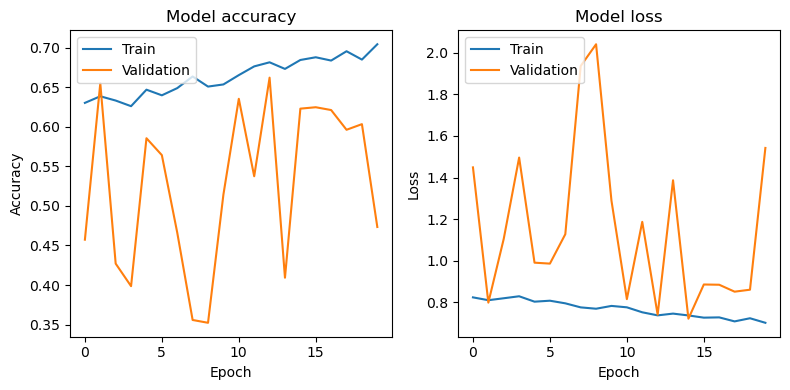

In [83]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()